<a href="https://colab.research.google.com/github/YasodaLAE/Image_Processing_Exercise/blob/main/210156U_a02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detected 186 blobs.


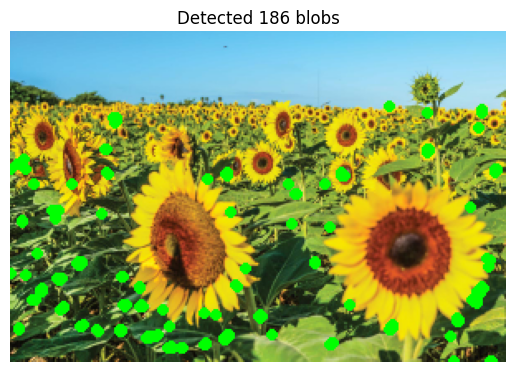

Center: (229,45), Radius: 2.83, Sigma: 2
Center: (285,47), Radius: 2.83, Sigma: 2
Center: (285,48), Radius: 2.83, Sigma: 2
Center: (252,49), Radius: 2.83, Sigma: 2
Center: (285,49), Radius: 2.83, Sigma: 2
Range of sigma values used: [ 2  3  4  5  6  7  8  9 10 11 12 13 14]


In [22]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the sunflower image
image_path = '/content/the_berry_farms_sunflower_field.jpeg'
im = cv.imread(image_path, cv.IMREAD_REDUCED_COLOR_4)

# Step 2: Convert the image to grayscale
gray = cv.cvtColor(im, cv.COLOR_BGR2GRAY)

# Step 3: Define the range of sigma values (scales)
sigma_values = np.arange(2, 15, 1)  # You can adjust the range

# Step 4: Store the Laplacian of Gaussian results for each sigma
log_images = []

for sigma in sigma_values:
    # Apply Gaussian smoothing
    blurred = cv.GaussianBlur(gray, (0, 0), sigma)

    # Compute Laplacian of the blurred image
    log_image = cv.Laplacian(blurred, cv.CV_64F)

    # Square the result to emphasize stronger responses (blobs)
    log_image = log_image ** 2

    log_images.append(log_image)

# Step 5: Stack the LoG images to create a scale-space
log_stack = np.stack(log_images, axis=-1)

# Step 6: Set a threshold to detect blobs
threshold = np.max(log_stack) * 0.5  # Adjust this threshold based on your image
blobs = np.argwhere(log_stack >= threshold)  # Find all blobs above the threshold

# Step 7: Draw circles for all detected blobs
if len(blobs) > 0:
    print(f"Detected {len(blobs)} blobs.")

    # Step 8: Loop over each detected blob and draw a circle
    for blob in blobs:
        y, x, scale_idx = blob
        sigma = sigma_values[scale_idx]
        radius = np.sqrt(2) * sigma  # Approximate radius from sigma

        # Draw a circle for each detected blob
        cv.circle(im, (x, y), int(radius), (0, 255, 0), 2)  # Green circle

    # Step 9: Display the image with all detected circles
    plt.imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
    plt.title(f"Detected {len(blobs)} blobs")
    plt.axis('off')
    plt.show()

    # Step 10: Report detected circles' parameters (for all blobs)
    for blob in blobs[:5]:  # Print parameters for first 5 blobs as an example
        y, x, scale_idx = blob
        sigma = sigma_values[scale_idx]
        radius = np.sqrt(2) * sigma
        print(f"Center: ({x},{y}), Radius: {radius:.2f}, Sigma: {sigma}")

    print(f"Range of sigma values used: {sigma_values}")
else:
    print("No blobs detected! Try adjusting the sigma range or threshold.")


In [31]:
!pip install tikzplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 kB 3.4 MB/s eta 0:00:00


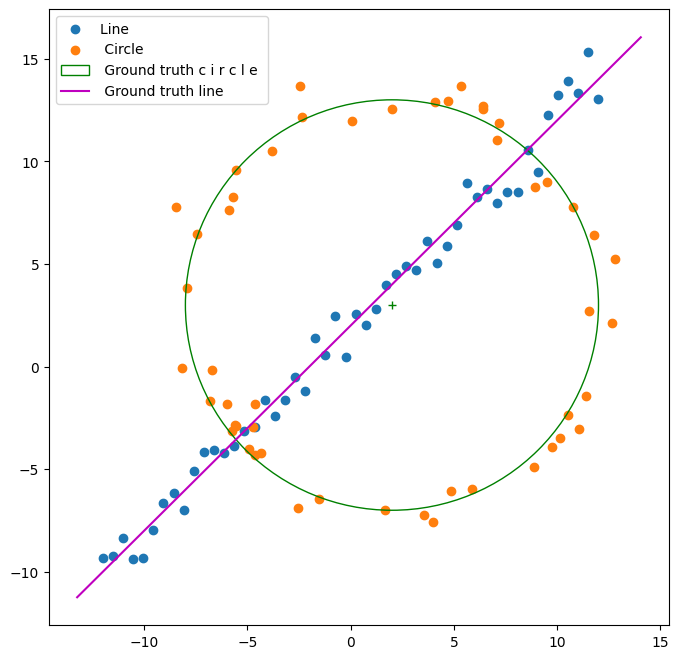

In [34]:
from scipy . optimize import minimize
from scipy import linalg
import matplotlib . pyplot as plt
import tikzplotlib

# np . random . seed ( 0 )
N = 100
half_n = N// 2
r = 10
x0_gt , y0_gt = 2 , 3 # Center
s = r /16
t = np . random . uniform (0 , 2*np . pi , half_n )
n = s*np . random . randn ( half_n )
x , y = x0_gt + ( r + n)*np . cos ( t ) , y0_gt + ( r + n)*np . sin ( t )
X_circ = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
s = 1.
m, b =1, 2
x = np . linspace (-12, 12 , half_n )
y = m*x + b + s*np . random . randn ( half_n )
X_line = np . hstack ( ( x . reshape ( half_n , 1 ) , y . reshape ( half_n , 1 ) ) )
X = np . vstack ( ( X_circ , X_line ) ) # A l l p o in t s
fig , ax = plt . subplots (1 ,1 , figsize =(8 ,8))
ax . scatter ( X_line [ : , 0 ] , X_line [ : , 1 ] , label= 'Line ' )
ax . scatter ( X_circ [ : , 0 ] , X_circ [ : , 1 ] , label= ' Circle ' )
circle_gt = plt . Circle ( ( x0_gt , y0_gt ) , r , color= 'g' , fill =False , label= ' Ground truth c i r c l e ' )
ax . add_patch ( circle_gt )
ax . plot ( ( x0_gt ) , ( y0_gt ) , '+ ' , color= 'g' )
x_min , x_max = ax . get_xlim ( )
x_ = np . array ( [ x_min , x_max ] )
y_ = m*x_ + b
plt . plot ( x_ , y_ , color= 'm' , label= ' Ground truth line ' )
plt . legend ( )